In [1]:
##what to head all ipython notebook:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
#linear model
from sklearn.linear_model import LogisticRegression
#svm
from sklearn.svm import SVC
#trees
from sklearn.tree import DecisionTreeClassifier
#NLF
from sklearn.feature_extraction.text import TfidfVectorizer
#boosting
from sklearn.ensemble import GradientBoostingClassifier
#PCA
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

#ESC + H for all the shortcuts

100 Data Science Programming Problems
=====================================


General Programming
-------------------


### 1. Write a function that converts a dictionary of equal length lists into a list of dictionaries.

 ```
    {'a': [1, 2, 3], 'b': [3, 2, 1]}
    => [{'a': 1, 'b': 3}, {'a': 2, 'b': 2}, {'a': 3, 'b': 1}]
    ```

In [2]:
d = {'a': [1, 2, 3], 'b': [3, 2, 1]}

In [3]:
d['a']

[1, 2, 3]

In [4]:
v = d.values()
k = d.keys()

In [5]:
len(v[0])

3

In [6]:
lst_dict = []
for i in range(len(v[0])):
    d_new = {}
    for x in d.keys():
        d_new[x] = d[x][i]
    lst_dict.append(d_new)

In [7]:
lst_dict

[{'a': 1, 'b': 3}, {'a': 2, 'b': 2}, {'a': 3, 'b': 1}]

In [8]:
def dict_to_list_of_dicts(d):
    lst_dict = []
    for i in range(len(v[0])):
        d_new = {}
        for x in d.keys():
            d_new[x] = d[x][i]
        lst_dict.append(d_new)
    return lst_dict

In [9]:
dict_to_list_of_dicts(d)

[{'a': 1, 'b': 3}, {'a': 2, 'b': 2}, {'a': 3, 'b': 1}]

### 2. Write the inverse function to the previous problem, convert a list of dictionaries into a dictionary of equal length lists.

    ```
    [{'a': 1, 'b': 3}, {'a': 2, 'b': 2}, {'a': 3, 'b': 1}]
    => {'a': [1, 2, 3], 'b': [3, 2, 1]}
    ```

In [10]:
lst_dict = [{'a': 1, 'b': 3}, {'a': 2, 'b': 2}, {'a': 3, 'b': 1}]

from collections import defaultdict
d_new=defaultdict(list)

for d in lst_dict:
    for k in d.keys():
        d_new[k].append(d[k])
        
d_new = dict(d_new)

In [11]:
d_new

{'a': [1, 2, 3], 'b': [3, 2, 1]}

In [12]:
def lst_dicts_to_dict(lst_dict):
    from collections import defaultdict
    d_new=defaultdict(list)

    for d in lst_dict:
        for k in d.keys():
            d_new[k].append(d[k])

    d_new = dict(d_new)
    return d_new

In [13]:
lst_dicts_to_dict(lst_dict)

{'a': [1, 2, 3], 'b': [3, 2, 1]}

### 3. Given two lists of characters with the same length, write a function that returns a list of booleans, also of the same length.  The value in the return list should be True if *either* of the characters in the two lists at that index are vowels, otherwise it should return false.

   ```
   (['a', 'b', 'c', 'd', 'e'], ['v', 'w', 'x', 'y', 'z'])
   => [True, False, False, False, True]
   ```


In [14]:
lst_vowels = ['a','e','i','o','u']

In [15]:
a, b = (['a', 'b', 'c', 'd', 'e'], ['v', 'w', 'x', 'y', 'z'])
new_lst=[]


for x,y in zip(a,b):
    if x in lst_vowels or y in lst_vowels:
        new_lst.append(True)
    else:
        new_lst.append(False)
        

In [16]:
def check_vowels(tuple_of_chars):
    lst_vowels = ['a','e','i','o','u']
    a, b = tuple_of_chars
    new_lst=[]

    for x,y in zip(a,b):
        if x in lst_vowels or y in lst_vowels:
            new_lst.append(True)
        else:
            new_lst.append(False)
            
    return new_lst

In [17]:
check_vowels((['a', 'b', 'c', 'd', 'e'], ['v', 'w', 'x', 'y', 'z']))

[True, False, False, False, True]

In [18]:
a,b = (['a', 'b', 'c', 'd', 'e'], ['v', 'w', 'x', 'y', 'z'])
l = zip(a,b)

In [19]:
zip(*l)
#holyshit!

[('a', 'b', 'c', 'd', 'e'), ('v', 'w', 'x', 'y', 'z')]

### 4. Write a function that takes a string, and returns a dictionary that keys a list of words in the string according to the first letter in the word.

   ```
   "a special string bearing an important salutation"
   => {'a': ['a', 'an'], 'b': ['bearing'], 'i': ['important'], 's': ['special', 'string', 'salutation']}
   ```


In [20]:
string = "a special string bearing an important salutation"

In [21]:
words = string.split(' ')

In [22]:
from collections import defaultdict
d = defaultdict(list)

for x in words:
    d[x[0]].append(x)

In [23]:
d

defaultdict(list,
            {'a': ['a', 'an'],
             'b': ['bearing'],
             'i': ['important'],
             's': ['special', 'string', 'salutation']})

In [24]:
def string_to_dict(string):
    words = string.split(' ')
    from collections import defaultdict
    d = defaultdict(list)

    for x in words:
        d[x[0]].append(x)
    return dict(d)

In [25]:
string_to_dict(string)

{'a': ['a', 'an'],
 'b': ['bearing'],
 'i': ['important'],
 's': ['special', 'string', 'salutation']}

### 5. Write a function that reads lines from two files, and writes out a new file.  You may assume that each line in the input files contain a single word.  The output file should have the words concatenated with a comma, but the two words on each line should be in alphabetical order.  If the input files have different lengths, write single words to the output file until the longer file is exhausted.


    ```
    File 1:  File2:
    This     And
    is       another
    a        file
    file
    of
    words

    Output File:
    And, This
    another, is
    a, file
    file
    of
    words
    ```

In [26]:
f1 = open('file1','w')
f1.write('This\n')
f1.write('is\n')
f1.write('a\n')
f1.write('file\n')
f1.write('of\n')
f1.write('words\n')
f1.close()

In [27]:
f2 = open('file2', 'w')
f2.write('And\n')
f2.write('another\n')
f2.write('file\n')
f2.close()

In [28]:
f1 = open('file1','r')
lst_f1 = f1.read()
lst_f1 = lst_f1.split('\n')
lst_f1 = lst_f1[:-1]
f1.close()

f2 = open('file2','r')
lst_f2 = f2.read()
lst_f2 = lst_f2.split('\n')
lst_f2 = lst_f2[:-1]
f2.close()

In [29]:
if len(lst_f1) <= len(lst_f2):
    end_idx = len(lst_f1)
    rest = lst_f2[end_idx:]
else:
    end_idx = len(lst_f2)
    rest = lst_f1[end_idx:]

In [30]:
lst_str = []

for i in range(end_idx):
    if lst_f1[i][0].lower() <= lst_f2[i][0].lower():
        s = ', '.join([lst_f1[i], lst_f2[i]])
    else:
        s = ', '.join([lst_f2[i], lst_f1[i]])
    lst_str.append(s)
lst_str = lst_str+rest

In [31]:
with open('newfile','w') as f:
    for x in lst_str:
        f.write(x+'\n')

In [32]:
f = open('newfile','r')
print f.read()

And, This
another, is
a, file
file
of
words



### 6. Given a list of equal length lists, transpose it.

    ```
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
    => [[1, 4, 7], [2, 5, 8], [3, 6, 9]]
    ```

In [33]:
lst = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [34]:
mat_T=[]
for i in range(len(lst)):
    new_row=[]
    for x in lst:
        new_row.append(x[i])
    mat_T.append(new_row)

In [35]:
mat_T

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

### 7. Given a list of numbers representing the coefficients in a polynomial (largest powers first), write a function that returns a pretty string representation of the polynomial.

    ```
    [1, 1, 1] => "x^2 + x + 1"
    [2, -1, -2] => "2x^2 - x -2"
    [0, 9, -10] => "9x - 10"
    ```

    Pay attention to edge cases!

In [36]:
def polynomial_str(lst):
    s = []
    for i,x in enumerate(lst[::-1]):
        if i>1:
            p = "x^"+str(i)
        elif i == 1:
            p = "x"
        else:
            p = ""
        
        if x>1:
            c = str(x)
        elif x<-1:
            c = " - "+str(abs(x))
        elif x == -1 and i > 0:
            c = " - "
        elif x == 1 and i == 0:
            c = "1"
        else:
            c = ""
        
        if x != 0:
            new_term = c+p
        else: 
            new_term = ""
            
        if new_term !="" or x != 0:
            s.append(new_term)
            
    return ' + '.join(s[::-1]).replace("+  -","-")

In [37]:
polynomial_str([2, -1, -2])

'2x^2 - x - 2'

### 8. We can represent a polynomial as a list of tuples, where each tuple is a (coefficient, degree) of a single monomial.  So, for example

    ```
    [(1, 0), (1, 1), (1, 2)] => 1 + x + x^2
    [(2, 0), (-2, 1), (2, 2), (-2, 2)] => 2 - 2x + 2x^2 -2x^2
    [(1, 0), (1, 1), (1, 0), (1, 1)] => 1 + x + 1 + x
    ```

Write a python function to simplify these polynomial data structures by combining terms with like degree. 

    ```
    simplify_polynomial([(1, 0), (1, 1), (1, 2)])
        => [(1, 0), (1, 1), (1, 2)]
    simplify_polynomial([(2, 0), (-2, 1), (2, 2), (-2, 2)])
        => [(2, 0), (-2, 1)]
    simplify_polynomial([(1, 0), (1, 1), (1, 0), (1, 1)])
        => [(2, 0), (2, 1)]
    ```

Notice that if a term in the simplified polynomial has degree zero, you should remove it from the resulting data structure.

In [38]:
l = [(2, 0), (-2, 1), (2, 2), (-2, 2)]

In [39]:
p_new = []
for i in range(len(l)):
    g = filter(lambda x: x[1] == i and x[0] !=0, l)
    
    if len(g) > 1:
        g0 = 0
        for x in g:
            g0+=x[0]
        g = [(g0,g[0][1])]
    if g:
        if g[0][0] != 0:
            p_new.append(g[0])

In [40]:
def simplify_polynomial(p):
    p_new = []
    for i in range(len(p)):
        g = filter(lambda x: x[1] == i and x[0] !=0, p)

        if len(g) > 1:
            g0 = 0
            for x in g:
                g0+=x[0]
            g = [(g0,g[0][1])]
        if g:
            if g[0][0] != 0:
                p_new.append(g[0])
    return p_new

In [41]:
simplify_polynomial([(1, 0), (1, 1), (1, 2)])

[(1, 0), (1, 1), (1, 2)]

In [42]:
simplify_polynomial([(1, 0), (1, 1), (1, 0), (1, 1)])

[(2, 0), (2, 1)]

### 9. Using the same representation of polynomials as in the above problem, write a function to compute and simplify the derivative of a polynomial data structure.  If you need a reminder on how to compute the derivative of polynomials, [here](https://www.intmath.com/differentiation/5-derivative-polynomials.php) is a sufficient reference.

    ```
    differentiate_polynomial([(1, 0), (1, 1), (1, 2)])
        => [(1, 0), (2, 1)]
    differentiate_polynomial([(2, 0), (-2, 1), (2, 2), (-2, 2)])
        => [(-2, 0)]
    differentiate_polynomial([(1, 0), (1, 1), (1, 0), (1, 1)])
        => [(1, 1)]
    ```

In [43]:
def differentiate_polynomial(p):
    p = simplify_polynomial(p)
    p_new = []
    for x in p:
        if x[1] > 0:
            p_new.append((x[0]*x[1],x[1]-1))
    return p_new

In [44]:
differentiate_polynomial([(1, 0), (1, 1), (1, 2)])

[(1, 0), (2, 1)]

In [45]:
differentiate_polynomial([(2, 0), (-2, 1), (2, 2), (-2, 2)])

[(-2, 0)]

In [46]:
differentiate_polynomial([(1, 0), (1, 1), (1, 0), (1, 1)])

[(2, 0)]

Data Manipulation - Numpy
-------------------------

### 1.  Given an integer numpy array of 0's and 1's, write a function that creates a new array where 0's are replaced with the word `"red"` and 1's are replaced with the word `"blue"`.

    ```
    np.array([0, 0, 1, 0, 1]) => np.array(["red", "red", "blue", "red", "blue"])
    ```

In [47]:
import numpy as np
a = np.array([0, 0, 1, 0, 1])

In [48]:
a = a.astype(str)

In [49]:
a[a=='0']='red'
a[a=='1']='blue'

In [50]:
a

array(['red', 'red', 'blue', 'red', 'blue'],
      dtype='|S21')

### 2.  Given two equal length arrays, `x` with general numeric data, and `b` with only 0's and 1's, compute the mean of the data in `x` at the positions where `b == 0` and the mean of the data in `x` at the positions where `b == 1`.

    ```
    x = np.array([1, 2, 3, 4, 5])
    b = np.array([1, 1, 0, 0, 1])
        => {0: 3.5, 1: 4}
    ```

In [51]:
x = np.array([1, 2, 3, 4, 5])
b = np.array([1, 1, 0, 0, 1])

In [52]:
x[b==1].mean()

2.6666666666666665

In [53]:
x[b==0].mean()

3.5

### 3. Write a function that consumes a two-dimensional numpy array (so, a matrix), and a label which is either "row" or "column".  The function should return a one-dimensional numpy array (vector) with either the row or column averages.

    ```
    X = np.array([[0, 1], [2, 1]])
    row_or_column_means(X, "row")
        => np.array([0.5, 1.5])
    row_or_column_means(X, "column")
        => np.array([1.0, 1.0])
    ```

In [54]:
def row_or_column_means(X, row_or_col):
    if row_or_col == "row":
        return X.mean(axis=1)
    elif row_or_col == "column":
        return X.mean(axis=0)
    else:
        raise ValueError("you have to give row or column!")

In [55]:
X = np.array([[0, 1], [2, 1]])

In [56]:
row_or_column_means(X, "column")

array([ 1.,  1.])

### 4.  Given an array `x`, and a matrix `M` (two dimensional array) with the same number of columns as the length of `x`, find the row in `M` that makes the smallest angle with `x`.


In [57]:
M = np.array([[1,1,1],[2,0,2],[3,4,3],[-1,0,0]])

In [58]:
x = [1,7,22]

In [59]:
len(M[0])

3

In [60]:
from numpy.linalg import norm

for y in M:
    print np.arccos(y.dot(x)/(norm(y)*norm(x)))

0.723441983582
0.790079879748
0.767163233575
1.61408407674


In [61]:
from numpy.linalg import norm

def min_angle_row(M,x):
    angles = []
    for y in M:
        angle = np.arccos(y.dot(x)/(norm(y)*norm(x)))
        angles.append(angle)
    angles = np.array(angles)
    min_row = angles.argmin()
    return M[min_row]

In [62]:
min_angle_row(M,x)

array([1, 1, 1])

In [63]:
from mpl_toolkits.mplot3d import Axes3D

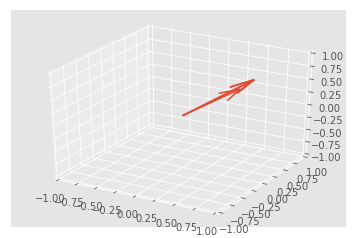

In [64]:
origin = [0,0,0]
X, Y, Z = zip(origin,origin,origin) 
U, V, W = zip([1,1,1],[2,0,2],[3,4,3])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X,Y,Z,U,V,W,normalize=True)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
plt.show()


### 5.  Given a number `n`, create a matrix of zeros, but with ones on the diagonals immediately below and above the main diagonal.  For example, when `n=5`, you should create the following matrix

    ```
    [
    [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0]
    ]
    ```

In [65]:
np.zeros((5,5))

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [66]:
n=5
np.ones(n-1)

array([ 1.,  1.,  1.,  1.])

In [67]:
def banded_diag(n):
    return np.diag(np.ones(n-1),k=-1)+np.diag(np.ones(n-1),k=1)
    

In [68]:
banded_diag(5)

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.]])

### 6.  Given a matrix `M`, create a new matrix containing only the *columns* of `M` where at least one of the entries is negative.

In [69]:
M = np.array([[1,0,-1,0,1],[1,1,2,9,0],[1,8,1,1,-1],[2,3,1,0,9],[-1,2,3,4,4]])

In [70]:
M

array([[ 1,  0, -1,  0,  1],
       [ 1,  1,  2,  9,  0],
       [ 1,  8,  1,  1, -1],
       [ 2,  3,  1,  0,  9],
       [-1,  2,  3,  4,  4]])

In [71]:
M.T

array([[ 1,  1,  1,  2, -1],
       [ 0,  1,  8,  3,  2],
       [-1,  2,  1,  1,  3],
       [ 0,  9,  1,  0,  4],
       [ 1,  0, -1,  9,  4]])

In [72]:
def negative_cols(M):
    M_new = []
    for x in M.T:
        if min(x)<0:
            M_new.append(x)
    M_new = np.array(M_new)
    return M_new.T

In [73]:
negative_cols(M)

array([[ 1, -1,  1],
       [ 1,  2,  0],
       [ 1,  1, -1],
       [ 2,  1,  9],
       [-1,  3,  4]])

### 7.  Write a function that swaps two rows of a matrix:

    ```
    def swap_rows(M, i, j)
    ```

In [74]:
M

array([[ 1,  0, -1,  0,  1],
       [ 1,  1,  2,  9,  0],
       [ 1,  8,  1,  1, -1],
       [ 2,  3,  1,  0,  9],
       [-1,  2,  3,  4,  4]])

In [75]:
M[1]

array([1, 1, 2, 9, 0])

In [76]:
M[4]

array([-1,  2,  3,  4,  4])

In [77]:
np.vstack((M[:1],M[4],M[2:4],M[1]))

array([[ 1,  0, -1,  0,  1],
       [-1,  2,  3,  4,  4],
       [ 1,  8,  1,  1, -1],
       [ 2,  3,  1,  0,  9],
       [ 1,  1,  2,  9,  0]])

In [78]:
def swap_rows(M, i, j):
    if j<i:
        i,j = j,i
    return np.vstack((M[:i],M[j],M[i+1:j],M[i]))

In [79]:
swap_rows(M,4,1)

array([[ 1,  0, -1,  0,  1],
       [-1,  2,  3,  4,  4],
       [ 1,  8,  1,  1, -1],
       [ 2,  3,  1,  0,  9],
       [ 1,  1,  2,  9,  0]])

### 8.  Write a function that creates a square matrix with a checkerboard pattern of 0's and 1's of any given size.

    ```
    [
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 1],
    ]
    ```

In [80]:
def checkered_m(n):
    m = np.diag(np.ones(n))
    if n%2 == 0:
        for i in range(n-2,0,-2):
            m+=np.diag(np.ones(i), k=n-i)
            m+=np.diag(np.ones(i), k=-n+i)
    else:
        for i in range(n-2,0,-2):
            m+=np.diag(np.ones(i),k=n-i)
            m+=np.diag(np.ones(i),k=-n+i)
    return m

In [81]:
checkered_m(6)

array([[ 1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.]])

In [82]:
checkered_m(5)

array([[ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  1.]])

### 9.  Write a function that takes *any* number of matrices, and determines if they can be multiplied in the order passed.

### 10.  Write a function that converts an  array of shape `(n, 2)` representing Cartesian coordinates of `n` points into a new `(n, 2)` array containing the polar coordinates of those points.

    ```
    np.array([[0, 1], [1, 0], [1, 1]])
        => np.array([1, np.pi], [1, 0], [np.sqrt(2), np.pi / 2])
    ```

In [87]:
M = np.array([[0, 1], [1, 0], [1, 1]])

In [97]:
np.arctan(-np.inf)

-1.5707963267948966

In [93]:
np.pi / 2

1.5707963267948966

### 11.  Given a `(n, 3)` matrix of points (each point is represented by one row, and has three coordinates), and an additional vector with three coordinates, return an `(n, 2)` matrix representing the projection of the original points onto the plane orthogonal to the vector.

    ```
    project_orthogonal_to_vector(matrix, vector)
    ```

    Is this problem fully specified?  Do you have to make any choices to accomplish this task?

### 12.  Write a function that takes two numpy arrays of shapes (n, k) and (m, k), representing points in k-dimensional space, and returns an array of shape (n, m) giving the Euclidean distance between each point in the first array and each point in the second. Try to write it without any loops.

Data Manipulation - Pandas
--------------------------

1. You have a pandas DataFrame `berries` which contains columns `type` and `size`.  Select all the (rows representing) blueberries larger than 0.5 cm in size.

1. You have a pandas DataFrame `berries` which contains columns `type` and `size`.  Create a dataframe containing the largest berry of each size.

1. You have a pandas DataFrame containing observations of stock prices over time, it contains columns `stock`, `day` and `price`.  Create a data frame that contains the stock price for each stock on the *day after* they achieve their maximum price.


Probability
-----------

1. You have a shuffled deck of 60 cards containing the following cards of special interest.  
  - Three of these cards in the deck are marked with a diamond.
  - Three of the cards are marked with a star.  
  - The remaining cards are nothing special.
    You draw an initial hand of five cards, after which you *must* discard any of the star cards for an additional three cards drawn from the top of the deck.  This process is repeated until you find yourself with a hand that does *not* contain any star cards.  Write a simulation to approximate the probability that your initial draw results in a final hand containing a diamond card. 

1. Use a built in function which samples data from a uniform distribution (for example `np.random.uniform` in python), to generate samples from the exponential distribution with a given parameter.  To start, consider reading about the [inverse sampling method](https://en.wikipedia.org/wiki/Inverse_transform_sampling).  Plot a histogram of data sampled using your code, and overlay the density function of an exponential distribution.

1. Write a function that samples random data from a true simple linear model with a given intercept, slope, and residual standard deviation.  Your function should additionally consume an array `x` containing data for the independent variable of the model:

    ```
    def generate_simple_linear_data(x, intercept, slope, residual_sd):
    ```

    The function should return the sampled `y` values.

1. You visit a website that provides amusing data-science jokes. Each time you visit it displays a joke randomly chosen from a finite set. Over the course of four visits, you see three unique jokes and one repeat. Using maximum likelihood estimation, estimate the total number of jokes on the website.


Statistics
----------

1. Write a function that computes the p-value from a one tailed exact binomial test for a population proportion.  Your function should have the following signature:

    ```
    def binomial_exact_test(n_samples, n_positive_samples, proposed_value)
    ```

    And should compute the p-value of the following test:

    ```
    H_0: p = proposed_value
    h_a: p > proposed_value
    ```

    Where `p` is the population proportion.

    You may utilize a built in function that computes the pmf or cmf of the Binomial distribution.

1. Write a linear regression class with the following methods:

    ```
    class LinearRegression(object):

        def __init__(self):
            self.coeffs_ = None

        def fit(X, y):
            pass

        def predict(X):
            pass
    ```

    To fit the regression, use a linear equation solver to explicitly solve the matrix equation `X^t X beta = X^t y` for beta.

1. Fit a logistic regression to `X_train` and `y_train`, then compute and return the proportion of data in `X_test` and `y_test` that are correctly classified when threasholding the predicted probabilities with `threas`.

    ```
    def logistic_accuracy(X_train, y_train, X_test, Y_test, thres)
    ```

1. Fit a logistic regression and return the maximal profit that can be achieved by classifying predicted probabilities for observations from a test set.  The profits/costs of true/false positives and true/false negatives are supplied in a two by two `profit_matrix` (profits are positive numbers, costs are negative numbers).

    ```
    def logistic_profit(X_train, y_train, X_test, Y_test, profit_matrix)
    ```

1. You are running a popular role-playing game. In it, the players create characters that have randomly generated values for 6 different attributes, each found by summing the rolls of three 6-sided dice, so each attribute will range from 3 to 18 (higher is better).

To save time you have each person generate their own characters before you get together, but you are worried some of them might cheat. Design a frequentist a/b test to investigate this. Consider the ways in which someone might cheat (in particular, cheaters don't want to get caught and might care more about some attributes than others).


Algorithms
----------

1. Given the following data:

  - A function `f: np.array => float` that maps a numpy array to a floating point number.
  - A function `df: np.array => np.array` that maps a numpy array to another numpy array, this is the gradient of `f`.
  - An initial point `_0x`, stored as a numpy array.
  - A learning rate `learning_rate`, a floating point number.
  - A `tolerance`, floating point number.

    Write an iterator `gradient_descent` (i.e. like a function, but uses `yield`) that generates the sequence of points by applying gradiend descent to the function `f`, starting at the initial point `x_0`, with the learning rate `learning_rate`, until the convergence tolerance `tolerance` is met.

    ```
    gradient_descent(f, df, x_0, learning_rate=0.01, tolerance=0.01)
    ```

2. In the same situation of the previous problem, except with the extra data

  - A function `ddf: np.array => np.array` that maps a numpy array to a matrix, this is the second derivative of `f`.

    Write an iterator that generates a sequence of points by applying Newton's method.  Try *not* to explicitly invert a matrix, use `np.linalg.solve` instead.

3. Write a class that implements *peicewise linear regression*.  This is a linear regression, but instead of fitting a single line to the data, it fits various lines of changing slope that join up continuously.  

![Piecewise Linear Regression](img/pw-regression.png)

The points where it changes slope are called *knots*.  Your class should have the following structure:

    ```
    class PWLinearRegression(object):
        """
        Fit piecewise linear regression on data.
        
        Parameters
        -------
        Knots : Array
            Knot locations.
        """
        def __init__(self, knots):
            pass
            
        def fit(self,x, y):
            """
            Fit piecewise linear model.
            
            Parameters
            ----------
            x : 1D numpy array of data inputs
            y : 1D numpy array of data responses
            """
            pass
            
        def predict(self, x):
            """
            Make predictions with fit model.
            
            Parameters
            ----------
            x : int, float, 1D array/list type of model prediction inputs.
            
            Returns
            -------
            Predicted response of x shape.
            """
            pass
        ```

Feel free to use any numpy or sklearn methods.


Plotting
--------

1.  Using your function that creates sample data from a simple linear model, superimpose the true linear model onto a scatterplot of the generated data. 

1. Create a (2, 3) grid of plots.  Inside each plot display the coordinates of the plot, like so:

    ```
    +----------+----------+----------+
    |  (0, 0)  |  (0, 1)  |  (0, 2)  |
    +----------+----------+----------+
    |  (1, 0)  |  (1, 1)  |  (1, 2)  |
    +----------+----------+----------+
    ```

1. Given a list pairs of ordered pairs, like so:

    ```
    [[(0, 1), (1, 0)], [(1, 1), (2, 2)], [(-1, 0), (0, -1)]]
    ```

    Plot each of them as vectors (as in, a picture of an arrow) whose tail is at the first coordinate, and whose head is at the second.


SQL
---

The following problems use tables with the following table schemas for a database keeping records of checkouts for library patrons and books.  This is only a selection of tables in the database, there are possibly many more.

#### Users

| column    | type    |
|-----------|---------|
| user_id   | int     |
| join_date | date    |
| branch_id | int     |
| name      | string  |

#### Books

| column       | type   |
|--------------|--------|
| book_id      | int    |
| author_id    | int    |
| genere_id    | int    |
| publish_date | date   |
| name         | string |

#### Checkouts

| column        | type      |
|---------------|-----------|
| user_id       | int       |
| book_id       | int       |
| checkout_time | timestamp |
| return_time   | timestamp |

The `return_time` field may be `null` in the case that the book has not yet been returned.


1. Write a query that returns all the users (by name) that have checked out a book within the last month.

1. Write a query that returns all the users (by name) that have a currently checked out book.

1. Assuming that the checkout time for a book is one month, write a query returning all users (by name) that have an overdue book.  Summarize this data to produce a list of possibly stolen books (you will have to come up with a reasonable interpretation of what this means).

1. Amend the prior query to return a table of all (user, book) pairs that are possibly stolen.  Identify the users and books by name in the query results.


Web Programming
---------------

1. Write a function `redbubble_creators` which takes a search string, and returns all the artists whose products appear on the first search result page when that search string is used.

    ```
    redbubble_creators('zelda')
    redbubble_creators('eno')
    ```
1. Add an optional argument, `type`, which will subset the returned artists from the previous query to only those that have a product form the given category.

    ```
    # Zelda stickers
    redbubble_creators('zelda', type='sticker')
    # Eno shirts
    redbubble_creators('eno', type='shirt')
    ```
1. Add an optional argument, `pages`, that will return search results from the given query appearing on the first `n` pages.

    ```
    # Zelda stickers on the first five pages
    redbubble_creators('zelda', type='sticker', pages=5)
    ```
1. Read the leaderboard for [Super Metroid](http://deertier.com/Leaderboard/AnyPercentRealTime) completion times into a data frame.

1. Using the leaderboards for [Ocarina of Time](http://zeldaspeedruns.com/leaderboards/oot/any), scrape data and then plot the progression of the world record over time.  That is, for each possible day, calculate the fastest submitted time up to that day.  Note that the leaderboard itself does not contain all submitted times, only the fastest submitted time for each user.  Following the hyperlink for each user in the leaderboard table will show you all the times submitted for that user, some of which may have stood as a world record in the past. 

In [83]:
ints = [4, 3, 2, 3, 4]
s=6

solns = set();

for i, x in enumerate(ints):
    a = ints[i+1:]
    if s-x in a:
        soln = (ints.index(x), a.index(s-x)+i+1)
        solns.add(soln)

In [84]:
solns

{(0, 2), (1, 3), (2, 4)}

In [85]:
sorted(solns)

[(0, 2), (1, 3), (2, 4)]

In [86]:
def sum_pairs(ints,s):
    solns = set();

    for i, x in enumerate(ints):
        a = ints[i+1:]
        if s-x in a:
            soln = (ints.index(x), a.index(s-x)+i+1)
            solns.add(soln)
            
    